<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-и-подготовка-данных" data-toc-modified-id="Описание-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание и подготовка данных</a></span></li><li><span><a href="#Моделиривание-без-учета-дисбаланса" data-toc-modified-id="Моделиривание-без-учета-дисбаланса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Моделиривание без учета дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Моделирование-с-учетом-дисбаланса" data-toc-modified-id="Моделирование-с-учетом-дисбаланса-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование с учетом дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Финальное-тестирование" data-toc-modified-id="Финальное-тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Финальное тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

In [2]:
from sklearn.model_selection import cross_validate

# Отток клиентов

## Описание проекта

**Заказчик** - «Бета-Банк». Необходимо провести анализ клиентов для создания системы предсказания, покинет ли клиент данный банк в ближайшее время или нет. Такая информация позволит подобрать подходящий способ удержать клиента в данном банке - по мнению банковских маркетологов сохранять текущих клиентов выйдет для банка дешевле, чем привлекать новых.

**Входные данные** - исторические данные о поведении клиентов и расторжении договоров с банком.

**Основная задача** - построить модель для задачи классификации, которая будет прогназировать, уйдет ли клиент из банка в ближайшее время или нет. Необходимое условие: значение показателя F1-меры должно превышать порог в 0.59.

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак:
* Exited — факт ухода клиента

## Описание и подготовка данных

Начнем с загрузки исходного набора данных. Также выведем основную информацию о данных. 

In [3]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('Churn.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Какие выводы можно сделать на текущий момент? 

Прежде всего, большинство переменных в исходных данных представлены численными типами: `float64` и `int64`. Помимо этого в данных присутствуют три переменные с типом `object` - для дальнейшей работы необходимо решить, что мы будет с ними делать, ведь в таком виде они не подойдут для моделирования. Рассмотрим каждую из данных характеристик в отдельности. Первая такая переменная отвечает за фамилию клиента - данная характеристика не является информативной при моделировании по следующей возможной причине. Существует довольно много разнообразных фамилий и вычленить какую-то зависимость между ними и поведением клиентов на проводимом нами довольно базовом моделировании довльно сложно. Именно поэтому нами было принято решение удалить данную характеристику. К данному типу также относятся переменные, отвечающие за регион проживания и пол клиента. Обе переменные могут оказывать некоторое влияние на поведение клиента, поэтому довльно важно учесть данные характеристики при моделировании. Для этого мы закодируем их при помощи метода One-Hot Encoding. Поскольку у нас всего две исходные характеристики и они обе принимают не слишком большое число уникальных значений, созданием категориальных переменных мы не станим чрезмерно множить переменные. 

Также нельзя не заметить наличие пропусков у одной из характеристик - количество лет, в течении которых клиент пользовался услугами рассматриваемого нами банка. Наблюдения с пропусками автоматически исключаются при моделировании методами машинного обучения, поэтому, чтобы не потерять часть данных, нам предстоит пободрать оптимальный способ заполнения данных пропусков. 

Как уже упоминалось ранее, большинство исходных переменных представлены численными типами. Для того, чтобы не потерять потенциально значимые переменные из-за того, что они обладают меньшими значениями по сравнению с другими переменными, используем стандартизацию данных. 

Наконец, хотелось бы отметить еще один значимый момент. Мы уже упоминали, что фамилия не является информативным параметром для наших моделей и, помимо данной характеристики, есть еще несолько неиформативных переменных, которые бы не стоило учитывать при моделировании - порядковый номер клиента, а также его ID. 

Начнем с заполнения пропусков. Выведем дискриптивную статистику по переменной `Tenure`. Позже, после заполнения, мы сравним новые данные, чтобы быть уверенными, что мы не слишком исказили выборку. 

In [6]:
print(data['Tenure'].describe())
data['Tenure'] = data['Tenure'].fillna(-1)

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


Попробуем заполнить пропуски при помощи информации о возрасте клиента. Мы руководствуемся следующей логикой - в рамках одного возраста люди являются клиентами банка примерно равное количество времени. 

Построим сводную таблицу по возрасту клиентов, в которой будет высчитывать медианное значение продолжительности периода времени, в течении которого человек являлся клиентом исследуемого нами банка. После создадим функцию, которая будет возвращать полученную медиану для тех наблюдений, в которых присутствует пропуск. 

In [7]:
ten_piv = data.pivot_table(index='Age', values = 'Tenure', aggfunc=['median']).reset_index()
ten_piv.columns = ['Age', 'Median']
ten_piv.head()

,Age,Median
0,18,4.0
1,19,5.0
2,20,4.0
3,21,4.0
4,22,5.0


In [8]:
def tenur_miss(row):
    age = row['Age']
    tenure = row['Tenure']
    if tenure == -1:
        for i in range(len(ten_piv)):
            if ten_piv['Age'][i] == age:
                return ten_piv['Median'][i]
    else: return tenure

In [9]:
data['Tenure'] = data.apply(tenur_miss, axis=1)

In [10]:
print(data['Tenure'].describe())

count    10000.000000
mean         4.948700
std          2.769609
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


Как можно заметить, смещение в описательных статистиках невелико - нам удалось заполнить пропущенные значения и при этом значительно не исказить исходные данные перед моделированием.

Теперь займемся созданием дамми-категорий. Для этого, прежде всего, удалим переменную, отвечающую за фамилию клиента. После этого создадим сами дамми-переменные, используя встроенные функции. 

In [11]:
del data['Surname']
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Теперь, когда большинство основных преобразований над данными совершены, перейдем к разбиению выборки. Поскольку в данных присутсвует сильный дисбаланс, в чем мы убедимся далее, - учтем это при разбиении данных на тренировочные и тестовые. 

In [13]:
X_numb = data.copy().drop(['Exited', 'RowNumber', 'CustomerId'], axis=1)
y = data[['Exited']]

In [14]:
RANDOM_STATE = 9

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_numb, y,
                                                  test_size=0.2, 
                                                  stratify = y,
                                                  shuffle = True,
                                                  random_state=RANDOM_STATE)

Наконец, перейдем к заключительному этапу моделирования - стандартизации численных переменных. Обучим скалер на тренировочной выборке, после чего применим его к тестовым и тренировочным данным. 

In [16]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [17]:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

/tmp/ipykernel_71/4007379277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric] = scaler.transform(X_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_71/4007379277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [18]:
print('Размер тренировочной выборки:', X_train.shape, y_train.shape)
print('Размер тестовой выборки:', X_test.shape, y_test.shape)

Размер тренировочной выборки: (8000, 11) (8000, 1)
Размер тестовой выборки: (2000, 11) (2000, 1)


Итак, на данном этапе мы провели предварительный анализ исходных данных. Нами была проведена следующая работа:
* Было выявлено наличие переменных типа `object`. Часть из них мы перевели в категориальные дамми-переменные. Остальные удалили из исходных данных за неинформативностью.
* Было выявлено наличие пропущенных наблюдений в переменной `Tenure`. Мы попытались заполнить пропуски основываясь на информации о возрасте клиентов. 
* Данные были разделены на тренировочные и тестовые с учетом дисбаланса.
* Данные были привидены к единому масштабу при помощи метода стандартизации.

## Моделиривание без учета дисбаланса

Перейдем к следующему этапу работы - моделированию. Однако перед этим проведем дополнительный анализ нашего таргета и исследуем его баланс классов.

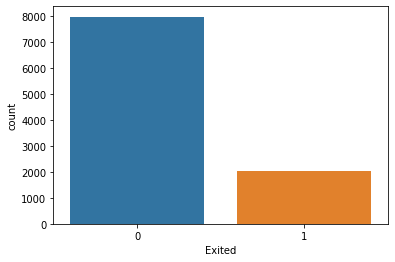

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
sns.countplot(data=y, x='Exited')
plt.show()
y['Exited'].value_counts()

Как можно заметить, данные состоят преимущественно из клиентов, которые не покидали исследуемый банк - число единиц в несколько раз меньше числа нулей. Такой перевес одного из классов может значительно повлиять на получаемые результаты. Поскольку ключевым значением таргета для нас является единица: то есть те клиенты, которые покинули банк, - при наличии малого числа таких наблюдений, предсказания полученных моделей может быть некачественным. В таком случае, даже при высоком значение ключевых метрик, наши модели не будут соответствовать запросам банка, поскольку будут плохо справляться со своей основной задачей - предсказывать клиентов, готовящихся покинуть банк. 

Для того, чтобы добиться более высокого качества наших моделей, а также сделать их предсказания более качественными, нам будет необходимо провести дополнительную работу по подготовке данных. Однако перед этим попробуем построить модели с имеющимися данными - возможно, имеющийся дисбаланс не столь существенен, как мы думаем, и стандартных моделей будет более чем достаточно.

В даной работе рассматриваются три модели машинного обучения с учителем - логистическая регрессия, дерево решений и случайный лес. Для каждой из моделей мы постараемся подобрать наиболее оптимальные параметры для того, чтобы достичь наибольшего значения ключевого показателя - F1-меры. Подбор параметров будет осуществляться при помощи метода GridSearch.

### Логистическая регрессия

Начнем с модели логистической регрессии. У данной модели мы рассмотрим два параметра: *solvers* и *penalty*. Первый параметр решает, какой решатель использовать для подбора модели. Второй параметр отвечает за наличие регуляризации, которая помогает снижать переобучение модели посредством наложения штрафов за большие коэффициенты. К сожалению, не каждый вид регуляризации подходит к различным видам решателей, что будет необходимо учесть при обучении модели логистической регрессии.

Итак, обучим модель логистической регрессии, подбирая такие значения параметров solvers и penalty, чтобы F1-мера была максимальной на тренировочной выборке.

In [20]:
logit = LogisticRegression(random_state=RANDOM_STATE)
# Определяем модель для обучения
params_log = {"penalty":["l1","l2"], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# Установливаем параметры для перебора
cv_log = GridSearchCV(logit, param_grid=params_log,
                      cv=5, scoring='f1')

cv_log.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=9),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [21]:
print('Лучшая логистическая регерссия:', cv_log.best_estimator_)
print('F-1 score:', cv_log.best_score_)
predict_one = cv_log.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшая логистическая регерссия: LogisticRegression(penalty='l1', random_state=9, solver='liblinear')
F-1 score: 0.3119700320586077
ROC-AUC: 0.7684962101877089


Итак, лучшая модель логистической регрессии имеет следующие параметры: penalty='l1' и solver='liblinear'. К сожалению, достигаемый показатель F1-меры не превышает минимальный порог в 0.59. Таким образом, данная модель с полученными параметрами нам не подходит.

### Дерево решений

Перейдем к следующей модели - решающее дерево. У данной модели мы рассмотрим следующие параметры: *max_depth* и *max_features*. Первый параметр отвечает за глубину дерева, второй характеризует максимальное число признаков, по которым ищется лучшее разбиение в дереве.

In [22]:
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_tree = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2']}
# Устанавливаем параметры для перебора
cv_tree = GridSearchCV(decision_tree, param_grid=params_tree,
                      cv=5, scoring='f1')

cv_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='f1')

In [23]:
print('Лучшее дерево решений:', cv_tree.best_estimator_)
print('F-1 score:', cv_tree.best_score_)
predict_one = cv_tree.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучшее дерево решений: DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=9)
F-1 score: 0.5241899630498322
ROC-AUC: 0.8648397877319876


Лучшее дерево решений имеет следующие параметры: max_depth=8 и max_features='auto'. Качество модели возросло, однако его все еще не достаточно для преоболения порога F1-меры в 0.59. Таким образом, модель решающего дерева с полученными параметрами также не подходит.

### Случайный лес

Наконец, перейдем к последней модели - случайному лесу. У данной модели мы рассмотрим следующие параметры: *max_depth*, *max_features* и *n_estimators*. Первые два мы уже рассматривали при построении дерева решений, так что подробнее расскажем только о последнем. Он определяет общее число деревьев, которые построит наша модель.

In [24]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'],
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest = GridSearchCV(random_forest, param_grid=params_forest,
                      cv=5, scoring='f1')

cv_forest.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [25]:
print('Лучший случайный лес:', cv_forest.best_estimator_)
print('F-1 score:', cv_forest.best_score_)
predict_one = cv_forest.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=80, random_state=9)
F-1 score: 0.5537307520405796
ROC-AUC: 0.9086269996436517


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> Дерево с параметрами, подобранными GridSearch! </font>
</div>

In [26]:
best_forest = RandomForestClassifier(max_depth=8, n_estimators=80, random_state=RANDOM_STATE)
scores = cross_validate(best_forest, X_train, y_train, scoring='f1', cv=5, return_estimator=True)
best_forest.fit(X_train, y_train)

print('Лучший случайный лес:', best_forest)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_train, (best_forest.predict_proba(X_train)[:, 1])))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=80, random_state=9)
F-1 score: 0.5537307520405796
ROC-AUC: 0.9086269996436517


Лучшая модель случайного леса имеет следующие параметры: max_depth=8 и n_estimators=80. Показатель качества данной модели также не превышает попроговое значение. Между тем, именно данная модель достигает наибольшего значения ключевой метрики.

Отметим также такой интересный момент. Несмотря на то, что значение ключевой метрики не достигло порогового значения, ROC-AUС у каждой из моделей был весьма высок - до 0.9 у случайного леса. Почему так произошло? Ответ кроется в принципе рассчета обоих параметров - F1-мера лучше оценивает выборки с дисбалансом, а также заботится о правильных предсказаниях положительного класса. А именно качественное предсказание положительного класса является основной нашей задачей.

Таким образом, без учета дисбаланса классов у нашего таргета довольно непросто получить качественную модель с высоким значением F1-меры. 

## Моделирование с учетом дисбаланса

Итак, полученные нами модели, которые мы обучали на исходных данных с дисбалансом, не смогли хорошо справиться со своей задачей - ни у одной из моделей достигаемый показатель F1-меры не перешел пороговое значение в 0.59. В таком случае, мы можем селать вывод, что дисбаланс в классах оказывает сильное влияние на качество и предсказательную силу получаемых моделей. Это значит, что для получение качественной модели, которая будет соответствовать всем тем требованиям, что предъявил нам заказчик, необходимо провести дополнительную работу и снизить влияние дисбаланса. 

Для снижения влияния дисбаланса мы будем использовать следующие методы:
1. Взвешивание классов
2. Увеличение выборки

### Взвешивание классов

Первый подход, который мы будем использовать - взвешенный классы. Мы будем использовать значение аргумента равное *balanced*. В таком случае вес класса будет зависеть от доли такого класса в выборке. 

Поскольку при моделировании без учета дисбаланса наибольшее качество было у модели случайного леса, при дальнейшем моделировании мы будем использовать именно данную модель.

In [27]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'], 
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest_balanced = GridSearchCV(random_forest, param_grid=params_forest,
                      cv=5, scoring='f1')

cv_forest_balanced.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [28]:
print('Лучший случайный лес:', cv_forest_balanced.best_estimator_)
print('F-1 score:', cv_forest_balanced.best_score_)
predict_one = cv_forest_balanced.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                       random_state=9)
F-1 score: 0.6156321176769578
ROC-AUC: 0.9145094432298639


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> Дерево с параметрами, подобранными GridSearch! </font>
</div>

In [29]:
best_forest_balanced = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                                              random_state=RANDOM_STATE)
scores = cross_validate(best_forest_balanced, X_train, y_train, scoring='f1', cv=5, return_estimator=True)
best_forest_balanced.fit(X_train, y_train)

print('Лучший случайный лес:', best_forest_balanced)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_train, (best_forest_balanced.predict_proba(X_train)[:, 1])))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

Лучший случайный лес: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=60,
                       random_state=9)
F-1 score: 0.6156321176769578
ROC-AUC: 0.9145094432298639


Лучшая модель случайного леса с балансировкой классов имеет следующие параметры: max_depth=8 и n_estimators=60. Показатель качества F1-меры данной модели наконец-то превышает пороговое значение. Более того, достигаемая нами ROC-AUC также высока.

Однако, не будем останавливаться только на одном методе и попробуем еще увеличить значение ключевого параметра.

### Увеличение выборки

Второй метод, который мы используем для борьбы с дисбалансом классов таргета - увеличение выборки. Используя данный метод мы искуственно завышаем число необходимой нам категории, дублируя их. В рамках нашего кейса мы увеличим число наблюдений, относящихся к положительной категории.

In [30]:
repeat = round(X_train[y_train['Exited'] == 0]['CreditScore'].count()/
    X_train[y_train['Exited'] == 1]['CreditScore'].count())

In [31]:
def upsample(features, target, repeat):
    features_zeros = features[target['Exited'] == 0]
    features_ones = features[target['Exited'] == 1]
    target_zeros = target[target['Exited'] == 0]
    terget_ones = target[target['Exited'] == 1]
    # pd.concat() - объединяет таблицы
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [terget_ones] * repeat)
    # shuffle() - перемешивает данные
    features_upsampled = shuffle(features_upsampled, random_state=9)
    target_upsampled = shuffle(target_upsampled, random_state=9)
    return features_upsampled, target_upsampled

X_upsampled, y_upsampled = upsample(X_train, y_train, repeat)

Посмотрим, как изменилось долевое соотношение после преобразования. Также вновь обучим модель случайного леса и оценим ее  качество на обновленных данных. 

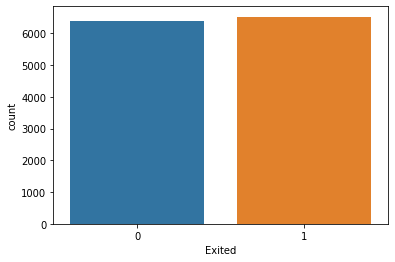

1    6520
0    6370
Name: Exited, dtype: int64

In [32]:
sns.countplot(data=y_upsampled, x='Exited')
plt.show()
y_upsampled['Exited'].value_counts()

In [33]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
# Задаем модель для обучения
params_forest = {'max_depth': range (1, 9, 1), 'max_features': ['auto', 'sqrt', 'log2'],
                 'n_estimators': range(50, 100, 10)}
# Указываем параметры для перебора
cv_forest_upsampled = GridSearchCV(random_forest, param_grid=params_forest, scoring='f1')

cv_forest_upsampled.fit(X_upsampled, y_upsampled)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(estimator=RandomForestClassifier(random_state=9),
             param_grid={'max_depth': range(1, 9),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(50, 100, 10)},
             scoring='f1')

In [34]:
print('Лучший случайный лес:', cv_forest_upsampled.best_estimator_)
print('F-1 score:', cv_forest_upsampled.best_score_)
predict_one = cv_forest_upsampled.predict_proba(X_train)[:, 1]
print('ROC-AUC:', roc_auc_score(y_train, predict_one))

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.8131386799000475
ROC-AUC: 0.9159651260220936


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'> Дерево с параметрами, подобранными GridSearch! </font>
</div>

In [35]:
best_forest_upsampled = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=RANDOM_STATE)
scores = cross_validate(best_forest_upsampled, X_upsampled, y_upsampled,
                        scoring='f1', return_estimator=True)
best_forest_upsampled.fit(X_upsampled, y_upsampled)

print('Лучший случайный лес:', best_forest_upsampled)
print('F-1 score:', scores['test_score'].mean())
print('ROC-AUC:', roc_auc_score(y_upsampled, (best_forest_upsampled.predict_proba(X_upsampled)[:, 1])))

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

Лучший случайный лес: RandomForestClassifier(max_depth=8, n_estimators=50, random_state=9)
F-1 score: 0.8131386799000475
ROC-AUC: 0.9159651260220936


Лучшая модель случайного леса с увеличенным числом положительного класса имеет следующие параметры: max_depth=8 и n_estimators=50,. Показатель качества F1-меры данной модели превышает не только пороговое значение ключевой меры, но также и аналогичный показатель предыдущей модели с балансировкой классов. Аналогично и для ROC-AUC. Именно данную модель мы признаем в качесте итоговой.

## Финальное тестирование

На данном этапе рассмотрим, как построенная нами модель, которую мы выбрали в качестве итоговой, справляется с предказаниями на тестовых данных. Напомним, что по итогу предыдущего этапа работы итоговой моделью была выбрана модель случайного леса со следующими параметрами: max_depth=8 и n_estimators=50.

In [36]:
print('F-1 score:', f1_score(y_test, cv_forest_upsampled.predict(X_test)))
print('ROC-AUC:', roc_auc_score(y_test, (best_forest_upsampled.predict_proba(X_test)[:, 1])))

F-1 score: 0.6294736842105263
ROC-AUC: 0.8705739637943027


Модель случайного леса показала неплохое значение критерия качества на тренировочной выборке, однако оба критерия несколько снизились на тестовой выборке. Наиболее вероятной причиной такой ситуации можно считать возникшее переобучения - наша итоговая модель слишком хорошо подстроилась к тренировочным данным. Также, вероятно, на это повлияло искуственное увеличение наблюдений с положительным классом путем копирования - по итогу модель получила слишком много однотипных положительных ответов и подстроилась под них.

## Выводы

Нами была проделана работа по созданию модели, которая будет выявлять тех клиентов «Бета-Банка», которые могут в скором времени отказаться от услуг данного банка. Всего нами было рассмотрено три модели: логистическая регрессия, решающее дерево и случайный лес. Для каждой из них мы попытались подобрать наиболее оптимальные параметры, которые бы позволили достичь наибольшее значение F1-меры на тестовой выборке. 

Моделирование проходило в два этапа. На первом этапе мы попытались построить модели, используя исходные данные с обнаруженным в них дисбалансом классов. Ни одна из рассмотренных нами моделей не смогла преодолеть порог ключевого показателя в 0.59. На втором этапе мы попытались учесть имеющийся дисбаланс: сменяли веса классов, увеличивали число наблюдений с положиетльными ответами. По итогу каждая из полученных на втором этапе моделей пересекла необходимый порог качества.

В качестве итоговой была выбрана модель случайного леса со следующими параметрами: max_depth=8 и n_estimators=50. Именно данная модель показала лучший результат на тренировочной выборке. В ней мы использовали увеличение количества положительных ответов для борьбы в дисбалансом. 

После этого мы проверили качество нашей итоговой модели на тестовой выборке. К сожалению, качество нашей итоговой модели несколько упало по сровнение с результатом на тренировочных данных - такой исход может свидетельствовать о переобучении нашей итоговой модели. 